# 信用卡詐欺
回歸練習

In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [200]:
data = pd.read_csv('/content/drive/My Drive/ML/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [201]:
count_classes = pd.value_counts(data['Class'])
count_classes

0    284315
1       492
Name: Class, dtype: int64

In [202]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Class 0: 0.9982725143693799
Class 1: 0.001727485630620034


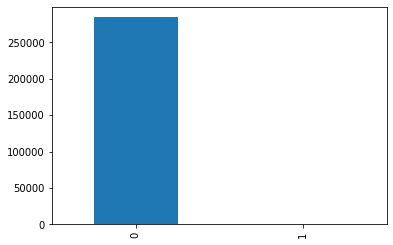

In [203]:
count_classes.plot(kind = 'bar')
print('Class 0:',count_classes[0]/data.shape[0])
print('Class 1:',count_classes[1]/data.shape[0])

1. 樣本極度不均，可以用sampling處理
2. 需要處理amount標準化

In [204]:
from sklearn.preprocessing import StandardScaler

In [205]:
data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))

In [206]:
data = data.drop(['Time','Amount'],axis=1)

In [207]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [208]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

## 下採樣 Under sampling

In [209]:
# 異常樣本索引
fraud_indices = np.array(y[y.Class == 1].index)
fraud_indices

array([   541,    623,   4920,   6108,   6329,   6331,   6334,   6336,
         6338,   6427,   6446,   6472,   6529,   6609,   6641,   6717,
         6719,   6734,   6774,   6820,   6870,   6882,   6899,   6903,
         6971,   8296,   8312,   8335,   8615,   8617,   8842,   8845,
         8972,   9035,   9179,   9252,   9487,   9509,  10204,  10484,
        10497,  10498,  10568,  10630,  10690,  10801,  10891,  10897,
        11343,  11710,  11841,  11880,  12070,  12108,  12261,  12369,
        14104,  14170,  14197,  14211,  14338,  15166,  15204,  15225,
        15451,  15476,  15506,  15539,  15566,  15736,  15751,  15781,
        15810,  16415,  16780,  16863,  17317,  17366,  17407,  17453,
        17480,  18466,  18472,  18773,  18809,  20198,  23308,  23422,
        26802,  27362,  27627,  27738,  27749,  29687,  30100,  30314,
        30384,  30398,  30442,  30473,  30496,  31002,  33276,  39183,
        40085,  40525,  41395,  41569,  41943,  42007,  42009,  42473,
      

In [210]:
# 正常樣本索引
normal_indices = np.array(y[y.Class == 0].index)
normal_indices

array([     0,      1,      2, ..., 284804, 284805, 284806])

In [211]:
# 異常樣本數量
number_records_fraud = len(fraud_indices)

# 取出與異常樣本數量相同的正常樣本
random_normal_indices = np.array(np.random.choice(normal_indices,number_records_fraud,replace=False))
random_normal_indices

array([ 10099, 144024,   7875,  47473, 234448, 245481,  48389, 130762,
       139368,  25180,  72468,  97509, 268009, 265430,  71669,  94368,
        21742, 174616, 124427,  81224, 114616,  12660, 229294, 282397,
       137657, 264434, 131598, 165764,  38386, 174605,  51322, 181203,
       141645, 184724, 213462, 204668, 111341, 231295, 226882,  51385,
       248028, 172283, 132428,  98089, 257199,  77386, 191981, 101628,
        84691,  66681, 275413, 148670,  87732, 210960, 161134, 171437,
        75152, 214669,  48188, 223013,   1359, 128241, 155182,  65128,
       130146,  12379,    744, 264215, 113690,  51195,  57206, 177014,
        36549,  53533, 214066, 115976,  22809,  76861, 105911, 154456,
       262772, 107544,   4124, 196574, 223120, 255435, 175938, 171130,
       242929, 203901, 233622, 237767, 184842,  82203,  52421, 135436,
        50879,  27163, 154272,  26246,  73315, 246216, 183598, 276789,
       241644,  71415,  60955, 231224, 154269, 213518, 266386, 199376,
      

In [212]:
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

In [213]:
X_undersample = X.iloc[under_sample_indices,:]
y_undersample = y.iloc[under_sample_indices,:]

In [214]:
print('下採樣後正常、異常樣本比例: ',len(y_undersample[y_undersample.Class == 0])/len(y_undersample),len(y_undersample[y_undersample.Class == 1])/len(y_undersample))

下採樣後正常、異常樣本比例:  0.5 0.5


## Cross validation

In [215]:
from sklearn.model_selection import train_test_split

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [217]:
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample, y_undersample, test_size = 0.3, random_state = 0)

## 模型訓練

In [218]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, recall_score, classification_report

In [219]:
def printing_Kfold_scores(x_train_data, y_train_data):
  fold = KFold(5, shuffle=False)

  # 回歸參數 正則化懲罰項
  c_param_range = [0.01, 0.1, 1, 10, 100]

  # 呈現結果
  results_table = pd.DataFrame(index = range(len(c_param_range),2), columns = ['C_parameter','Mean recall score'])
  results_table['C_parameter'] = c_param_range

  j = 0
  for c_param in c_param_range:
    print('--------------------------------')
    print('正則化懲罰項: ', c_param)
    print('--------------------------------')
    print('')

    recall_accs = []
    for iteration, indices in enumerate(fold.split(y_train_data)):
      lr = LogisticRegression(C=c_param, penalty='l1', solver='liblinear')
      lr.fit(x_train_data.iloc[indices[0],:], y_train_data.iloc[indices[0],:].values.ravel())
      y_pred = lr.predict(x_train_data.iloc[indices[1],:])
      recall_acc = recall_score(y_train_data.iloc[indices[1],:].values,y_pred)
      recall_accs.append(recall_acc)
      print('Iteration ',iteration,': 召回率 = ',recall_acc)
    
    results_table.loc[j,'Mean recall score'] = np.mean(recall_accs)
    j += 1
    print('')
    print('平均召回率 ', np.mean(recall_accs))
    print('')

  best_c = results_table.loc[results_table['Mean recall score'].astype('float32').idxmax()]['C_parameter']
  best_recall = results_table.loc[results_table['Mean recall score'].astype('float32').idxmax()]['Mean recall score']

  print('*********************************************************************************')
  print('最佳模型參數 = ', best_c)
  print('最佳平均召回率 = ', best_recall)
  print('*********************************************************************************')

  return best_c



In [220]:
best_c = printing_Kfold_scores(X_train_undersample,y_train_undersample)

--------------------------------
正則化懲罰項:  0.01
--------------------------------

Iteration  0 : 召回率 =  0.9315068493150684
Iteration  1 : 召回率 =  0.9178082191780822
Iteration  2 : 召回率 =  0.9830508474576272
Iteration  3 : 召回率 =  0.9594594594594594
Iteration  4 : 召回率 =  0.9545454545454546

平均召回率  0.9492741659911385

--------------------------------
正則化懲罰項:  0.1
--------------------------------

Iteration  0 : 召回率 =  0.8493150684931506
Iteration  1 : 召回率 =  0.863013698630137
Iteration  2 : 召回率 =  0.9322033898305084
Iteration  3 : 召回率 =  0.9324324324324325
Iteration  4 : 召回率 =  0.9090909090909091

平均召回率  0.8972110996954274

--------------------------------
正則化懲罰項:  1
--------------------------------

Iteration  0 : 召回率 =  0.8493150684931506
Iteration  1 : 召回率 =  0.863013698630137
Iteration  2 : 召回率 =  0.9491525423728814
Iteration  3 : 召回率 =  0.9324324324324325
Iteration  4 : 召回率 =  0.9090909090909091

平均召回率  0.900600930203902

--------------------------------
正則化懲罰項:  10
--------------------

## 混淆矩陣

In [221]:
lr = LogisticRegression(C=best_c, penalty='l1', solver='liblinear')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample = lr.predict(X_test_undersample)

In [222]:
cnf_matrix = confusion_matrix(y_test_undersample,y_pred_undersample)
cnf_matrix

array([[130,  19],
       [ 11, 136]])

In [223]:
print("召回率: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

召回率:  0.9251700680272109


In [224]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        # print("Normalized confusion matrix")
    else:
        # print('Confusion matrix, without normalization')
        next

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

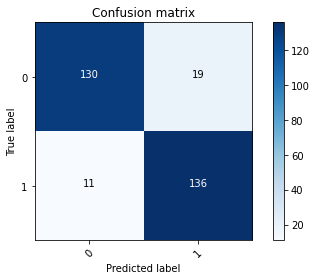

In [225]:
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

## 找閥值

In [226]:
lr = LogisticRegression(C=best_c, penalty='l1', solver='liblinear')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample = lr.predict(X_test_undersample)
y_pred_prob = lr.predict_proba(X_test_undersample)

In [227]:
thresholds = np.arange(0.1,1,0.1)
plt.figure(figsize=(50,50))
j = 1

<Figure size 3600x3600 with 0 Axes>

當閥值為： 0.1 時，召回率為:  1.0
當閥值為： 0.2 時，召回率為:  1.0
當閥值為： 0.30000000000000004 時，召回率為:  1.0
當閥值為： 0.4 時，召回率為:  0.9727891156462585
當閥值為： 0.5 時，召回率為:  0.9251700680272109
當閥值為： 0.6 時，召回率為:  0.8843537414965986
當閥值為： 0.7000000000000001 時，召回率為:  0.8299319727891157
當閥值為： 0.8 時，召回率為:  0.7687074829931972
當閥值為： 0.9 時，召回率為:  0.5782312925170068


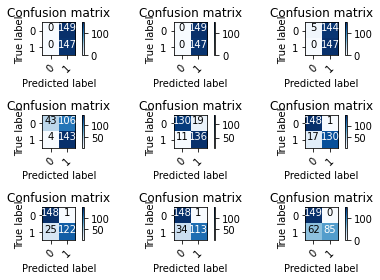

In [228]:
for i in thresholds:
  y_test_predictions_high_recall = y_pred_prob[:,1] > i
  plt.subplot(3,3,j)
  j += 1

  cnf_matrix = confusion_matrix(y_test_undersample,y_test_predictions_high_recall)
  np.set_printoptions(precision=2)

  print("當閥值為：",i,"時，召回率為: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
  plot_confusion_matrix(cnf_matrix, classes=[0,1])